## Observations and Insights

## Dependencies and starter code

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
combined_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [7]:
# Summary statistics

In [8]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
 # create a Data Frame
## mean "Tumor Volume Data" grouped by drug and timepoint
tumor_mean = combined_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
tumor_median = combined_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
tumor_var = combined_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tumor_std = combined_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tumor_sem = combined_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
summary = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Var": tumor_var,
    "std": tumor_std,
    "Sem": tumor_sem
})
summary

,Mean,Median,Var,std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_counts = combined_df["Drug Regimen"].value_counts()
drug_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

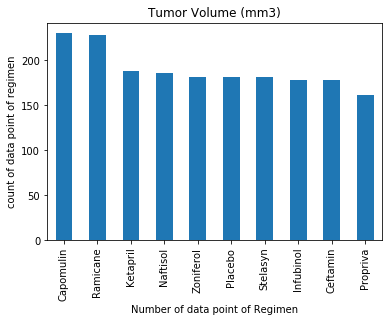

In [15]:
drug_counts.plot(kind="bar")
plt.title("Tumor Volume (mm3)")
plt.xlabel("Number of data point of Regimen")
plt.ylabel("count of data point of regimen")
plt.show()

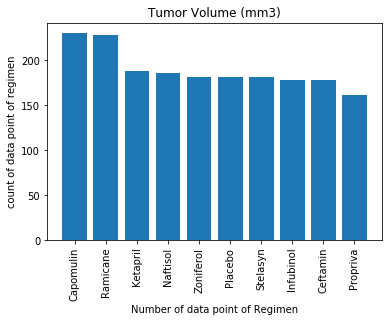

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot 
# Set the data point 
plt.bar(drug_counts.index.values, drug_counts.values)
plt.title("Tumor Volume (mm3)")
plt.xlabel("Number of data point of Regimen")
plt.xticks(rotation=90)
plt.ylabel("count of data point of regimen")
plt.show()



# Pie plots

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = (combined_df.groupby(["Sex"])["Age_months"].count())
gender_count

Sex
Female    935
Male      958
Name: Age_months, dtype: int64

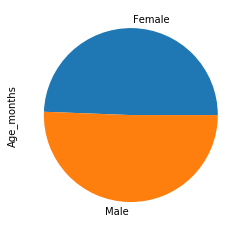

In [18]:
gender_count.plot(kind="pie")

In [19]:
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x1a191ab7d0>,
 [Text(-0.7887477729166416, -0.904365496201087, 'Females'),
  Text(0.723018791840255, 0.8290017048509963, 'Males')],
 [Text(-0.4601028675347076, -0.527546539450634, '49.4%'),
  Text(0.39437388645832083, 0.4521827481005434, '50.6%')])

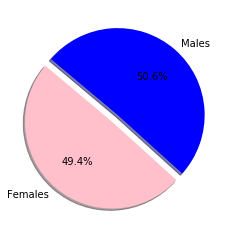

In [20]:


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [21]:
## Quartiles, outliers and boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
rx_df=combined_df.groupby("Mouse ID").max()
rx_df


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [24]:
max_df=rx_df["Timepoint"] 
max_df=max_df.reset_index()
max_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [25]:
merge_df=combined_df.merge(max_df)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [26]:
# Select data for Capomulin regimen and reset index
cap_data_df = merge_df[merge_df['Drug Regimen'].isin(['Capomulin'])]["Tumor Volume (mm3)"]
cap_data_df.head()

1     23.343598
2     28.484033
3     28.430964
6     30.485985
10    31.023923
Name: Tumor Volume (mm3), dtype: float64

In [27]:
cef_data_df = merge_df[merge_df['Drug Regimen'].isin(['Ceftamin'])]["Tumor Volume (mm3)"]
cef_data_df.head()

52    62.999356
65    45.000000
66    56.057749
68    55.742829
97    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [28]:
pro_data_df = merge_df[merge_df['Drug Regimen'].isin(['Propriva'])]["Tumor Volume (mm3)"]
pro_data_df.head()

59     62.191414
83     64.183229
104    61.774963
105    70.492788
107    62.570880
Name: Tumor Volume (mm3), dtype: float64

In [29]:
inf_data_df = merge_df[merge_df['Drug Regimen'].isin(['Infubinol'])]["Tumor Volume (mm3)"]
inf_data_df.head()

49    67.973419
50    65.525743
57    57.031862
58    66.083066
70    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [30]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_data_df.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of cap_data_df is: {lowerq}")
print(f"The upper quartile of cap_data_df is: {upperq}")
print(f"The interquartile range of cap_data_df is: {iqr}")
print(f"The the median of cap_data_df is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

cap_outliers=cap_data_df[(cap_data_df < lower_bound)|(cap_data_df > upper_bound)]
print(cap_outliers)

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of cap_data_df is: 32.37735684
The upper quartile of cap_data_df is: 40.1592203
The interquartile range of cap_data_df is: 7.781863460000004
The the median of cap_data_df is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [31]:
quartiles = cef_data_df.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of cef_data_df is: {lowerq}")
print(f"The upper quartile of cef_data_df is: {upperq}")
print(f"The interquartile range of cef_data_df is: {iqr}")
print(f"The the median of cef_data_df is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
cef_outliers=cef_data_df[(cef_data_df < lower_bound)|(cef_data_df > upper_bound)]
print(cef_outliers)

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of cef_data_df is: 48.72207785
The upper quartile of cef_data_df is: 64.29983003
The interquartile range of cef_data_df is: 15.577752179999997
The the median of cef_data_df is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [32]:
quartiles = pro_data_df.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of pro_data_df is: {lowerq}")
print(f"The upper quartile of pro_data_df is: {upperq}")
print(f"The interquartile range of pro_data_df is: {iqr}")
print(f"The the median of pro_data_df is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
pro_outliers=pro_data_df[(pro_data_df < lower_bound)|(pro_data_df > upper_bound)]
print(pro_outliers)

0.25    49.122969
0.50    55.841410
0.75    62.570880
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of pro_data_df is: 49.12296898
The upper quartile of pro_data_df is: 62.57087961
The interquartile range of pro_data_df is: 13.447910629999996
The the median of pro_data_df is: 55.84141007 
Values below 28.95110303500001 could be outliers.
Values above 82.742745555 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [33]:
quartiles = inf_data_df.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of inf_data_df is: {lowerq}")
print(f"The upper quartile of inf_data_df is: {upperq}")
print(f"The interquartile range of inf_data_df is: {iqr}")
print(f"The the median of inf_data_df is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
inf_outliers=inf_data_df[(inf_data_df < lower_bound)|(inf_data_df > upper_bound)]
print(inf_outliers)

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of inf_data_df is: 54.04860769
The upper quartile of inf_data_df is: 65.52574285
The interquartile range of inf_data_df is: 11.477135160000003
The the median of inf_data_df is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
74    36.321346
Name: Tumor Volume (mm3), dtype: float64


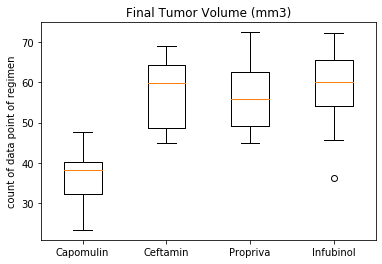

In [34]:
plt.boxplot([cap_data_df, cef_data_df, pro_data_df, inf_data_df], labels=["Capomulin", "Ceftamin", "Propriva", "Infubinol"])
plt.title("Final Tumor Volume (mm3)")
plt.ylabel("count of data point of regimen")
plt.show()


## Line and scatter plots

In [35]:
cap_data_df.head()

1     23.343598
2     28.484033
3     28.430964
6     30.485985
10    31.023923
Name: Tumor Volume (mm3), dtype: float64

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df=combined_df[combined_df["Drug Regimen"]=="Capomulin"]
capomulin_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [37]:
capomulin_df=combined_df[combined_df["Mouse ID"]=="s185"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


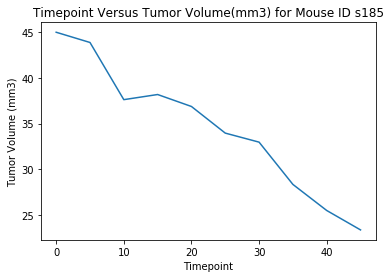

In [38]:
plt.plot("Timepoint", "Tumor Volume (mm3)", data=capomulin_df)
plt.title("Timepoint Versus Tumor Volume(mm3) for Mouse ID s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [72]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [78]:
capomulin_df=combined_df[combined_df["Drug Regimen"]=="Capomulin"]
capomulin_df = capomulin_df[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_group_data = combined_df.groupby(["Mouse ID","Weight (g)"])
capomulin_df = cap_group_data["Tumor Volume (mm3)"].mean().to_frame()
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,a203,23,56.312708
1,a251,25,55.237095
2,a262,29,58.611631
3,a275,28,52.770965
4,a366,29,54.639906


In [103]:
mouse_id = combined_df.iloc[:,0]
tumor_volume(mm3)= combined_df.iloc[:,3]
plt.scatter(mouse_id, violent_crime_rate)
plt.xlabel('Mouse ID')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

SyntaxError: can't assign to function call (<ipython-input-103-509a0a4beeb5>, line 2)

In [142]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen



SyntaxError: invalid syntax (<ipython-input-142-23b3b97007f0>, line 5)

In [95]:
 # Add the linear regression equation and line to plot